# Инструменты и методы работы с большими массивами текстовой информации
 

## Занятие 2. Знакомство с NumPy и Pandas

### Наши инструменты

#### Python

У всех датасайентистов свои привычки и вкусы. Часто требования к используемым инструментам выставляются на работе, особенно если она происходит в команде с другими аналитиками и разработчиками. Чаще всего аналитики данных используют язык программирования Python (его мы и будем использовать в этом курсе) по нескольким причинам:
   
- Популярность языка в целом (в первой тройке по различным критериям на Github и в десятке самых популярных по различным точкам зрения других рейтингов) — много разработчиков, много различных инструментов.
- Простота изучения — многие аналитики данных не являются программистами как таковыми, а при обучении стремятся как можно быстрее изучить необходимый им инструмент. 
- Простота использования. Python — интерпретируемый язык (не требует компиляции кода) с динамической типизацией и многими прочими особенностями, позволяющими как можно меньше думать о программировании и больше концентрироваться на решении конкретной задачи.
   
Нельзя сказать, что можно обойтись на практике одним лишь языком Python. Большинство реальных систем предъявляет требования к скорости работы, а Python в этом обычно уступает классическим компилируемым языкам вроде C++ или Java, поэтому на практике часто подготовленные на Python решения переписываются или встраиваются с минимальными потерями в другие языки.

Кроме Python, аналитики данных часто используют язык R, который так же достаточно прост и удобен, однако почти не используется в кругах разработчиков. Реже и в некоторых специфичных задачах применяются Matlab и SAS.

#### Библиотеки

Но одним лишь языком программирования не обойтись — используются различные инструменты и библиотеки (мы рассматриваем лишь Python):
   
- Среда разработки.  На семинарах и в домашках мы будем использовать [Jupyter Notebook](https://jupyter.org). Он позволяет как писать код и запускать его отдельными фрагментами, так и оформлять всё в виде отчёта с markdown разметкой и формулами LaTex. И даже [вставлять видосы с YouTube](https://gist.github.com/christopherlovell/e3e70880c0b0ad666e7b5fe311320a62)! 
- Библиотеки для обработки данных: [NumPy](https://numpy.org) и [Pandas](https://pandas.pydata.org).
- Библиотеки для визуализации данных: [Matplotlib](https://matplotlib.org) и [Seaborn](https://seaborn.pydata.org/#).
- Библиотеки с алгоритмами машинного обучения: [scikit-learn](http://scikit-learn.github.io/stable), [XGBoost](https://xgboost.readthedocs.io/en/latest/) и [pytorch](https://pytorch.org).

# NumPy

**NumPy** — библиотека языка Python, позволяющая [удобно] работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении.

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

In [2]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей

1

In [3]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

2

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [4]:
vec.shape

(3,)

Чтобы узнать тип элементов и их размер в байтах:

In [5]:
mat.dtype.name

'int64'

In [6]:
mat.itemsize

8

## Создание массивов

* Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [7]:
A = np.array([1, 2, 3])
A, A.dtype

(array([1, 2, 3]), dtype('int64'))

In [8]:
A = np.array([1, 2, 3], dtype=float)
A, A.dtype

(array([1., 2., 3.]), dtype('float64'))

* Создание массивов специального вида при помощи функций zeros, ones, empty, identity:

In [9]:
np.zeros((3,))

array([0., 0., 0.])

In [10]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
np.empty((2, 5))

array([[-1.28822975e-231, -1.28822975e-231,  4.44659081e-323,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000, -1.28822975e-231, -1.28822975e-231,
         1.77229088e-310,  3.50977866e+064]])

Обратите внимание, что содержимое массива, созданного при помощи функции empty, **не инициализируется**, то есть в качестве значений он **может содержать "мусор"**.

* Создание последовательностей при помощи функций arange (в качестве парметров принимает левую и правую границы последовательности и **шаг**) и linspace (принимает левую и правую границы и **количество элементов**):

In [13]:
np.arange(2, 20, 3) # аналогично стандартной функции range python, правая граница не включается

array([ 2,  5,  8, 11, 14, 17])

In [14]:
np.arange(2.5, 8.7, 0.9) # но может работать и с вещественными числами

array([2.5, 3.4, 4.3, 5.2, 6.1, 7. , 7.9])

In [15]:
np.linspace(2, 18, 14) # правая граница включается (по умолчанию)

array([ 2.        ,  3.23076923,  4.46153846,  5.69230769,  6.92307692,
        8.15384615,  9.38461538, 10.61538462, 11.84615385, 13.07692308,
       14.30769231, 15.53846154, 16.76923077, 18.        ])

* Для изменения размеров существующего массива можно воспользоваться функцией reshape (при этом количество элементов должно оставаться неизменным):

In [16]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [17]:
np.arange(8).reshape(2, -1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

* Транспонирование существующего массива:

In [18]:
C = np.arange(6).reshape(2, -1)
C

array([[0, 1, 2],
       [3, 4, 5]])

In [19]:
C.T

array([[0, 3],
       [1, 4],
       [2, 5]])

* Объединение существующих массивов по заданной оси:

In [20]:
A = np.arange(6).reshape(2, -1)
np.hstack((A, A**2))

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

In [21]:
np.vstack((A, A**2))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0,  1,  4],
       [ 9, 16, 25]])

In [22]:
np.concatenate((A, A**2), axis=1)

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

* Повторение существующего массива

In [23]:
a = np.arange(3)
np.tile(a, (2, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [24]:
np.tile(a, (4, 1))

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

## Базовые операции

* Базовые арифметические операции над массивами выполняются поэлементно:

In [25]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [26]:
print(A)
print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [27]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [28]:
A * 1.0 / B

array([[0.        , 0.5       , 0.66666667],
       [0.75      , 0.8       , 0.83333333],
       [0.85714286, 0.875     , 0.88888889]])

In [29]:
A + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
3 * A

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [31]:
A ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [32]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Для выполнения матричного умножения необходимо использовать функцию dot:

In [33]:
A.dot(B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [34]:
np.tile(np.arange(0, 40, 10), (3, 1)).T + np.array([0, 1, 2])

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

* Универсальные функции (sin, cos, exp и т.д.) также применяются поэлементно:

In [35]:
np.exp(A)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00],
       [2.00855369e+01, 5.45981500e+01, 1.48413159e+02],
       [4.03428793e+02, 1.09663316e+03, 2.98095799e+03]])

* Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [36]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [37]:
A.min()

0

In [38]:
A.max(axis=1)

array([2, 5, 8])

In [39]:
A.sum(axis=1)

array([ 3, 12, 21])

## Индексация

Для доступа к элементам может использоваться [много различных способов](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), рассмотрим основные.

* Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [40]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
a[2:5]

array([2, 3, 4])

In [42]:
a[3:8:2]

array([3, 5, 7])

In [43]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [44]:
A[2:4]

array([[18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [45]:
A[:, 2:4]

array([[ 2,  3],
       [11, 12],
       [20, 21],
       [29, 30],
       [38, 39],
       [47, 48],
       [56, 57],
       [65, 66],
       [74, 75]])

In [46]:
A[2:4, 2:4]

array([[20, 21],
       [29, 30]])

In [47]:
A[-1]

array([72, 73, 74, 75, 76, 77, 78, 79, 80])

* Также может использоваться индексация при помощи списков индексов (по каждой из осей):

In [48]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [49]:
A[[2, 4, 5], [0, 1, 3]]

array([18, 37, 48])

* Может также применяться логическая индексация (при помощи логических массивов):

In [50]:
A = np.arange(11)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [51]:
A[A % 5 != 3]

array([ 0,  1,  2,  4,  5,  6,  7,  9, 10])

In [52]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

array([ 0,  1,  2,  4,  5,  6,  9, 10])

## Примеры

In [53]:
A = np.arange(120).reshape(10, -1)
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

1. Выбрать все четные строки матрицы A.
2. Составить одномерный массив из всех не делящихся на 3 элементов нечетных столбцов А.
3. Посчитать сумму диагональных элементов A.

In [54]:
# Your code here

## Зачем?

Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать скалярное произведение 2 больших векторов:

In [55]:
import time

A_quick_arr = np.random.normal(size = (1000000,))
B_quick_arr = np.random.normal(size = (1000000,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [56]:
%%time
ans = 0
for i in range(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]

CPU times: user 524 ms, sys: 6.2 ms, total: 530 ms
Wall time: 533 ms


In [57]:
%%time
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(1000000)])

CPU times: user 399 ms, sys: 30.5 ms, total: 429 ms
Wall time: 436 ms


In [58]:
%%time
ans = np.sum(A_quick_arr * B_quick_arr)

CPU times: user 5.13 ms, sys: 1.48 ms, total: 6.61 ms
Wall time: 4.46 ms


In [59]:
%%time
ans = A_quick_arr.dot(B_quick_arr)

CPU times: user 5.03 ms, sys: 1.18 ms, total: 6.22 ms
Wall time: 907 µs


# Работа с данными (Pandas)
<img src="https://www.dropbox.com/s/qeh64d6jsynffo7/pandas.gif?raw=1">

Аналитикам часто приходится работать с табличными данными. В Python это удобно делать с помощью библиотеки Pandas, давайте с ней познакомимся.

In [60]:
import pandas as pd

Сегодня мы с вами будем работать с [корпусом русскоязычных твитов](http://study.mokoron.com)

Корпус состоит из 12 столбцов:

    – id: уникальный номер сообщения в системе twitter;
    – tdate: дата публикации сообщения (твита);
    – tmane: имя пользователя, опубликовавшего сообщение;
    – ttext:  текст сообщения (твита);
    – ttype: поле в котором в дальнейшем будет указано к кому классу относится твит (положительный, отрицательный, нейтральный);
    – trep: количество реплаев к данному сообщению. В настоящий момент API твиттера не отдает эту информацию;
    – tfav: число сколько раз данное сообщение было добавлено в избранное другими пользователями;
    – tstcount: число всех сообщений пользователя в сети twitter;
    – tfol: количество фолловеров пользователя (тех людей, которые читают пользователя);
    – tfrien: количество друзей пользователя (те люди, которых читает пользователь);
    – listcount: количество листов-подписок в которые добавлен твиттер-пользователь.

Загрузим данные:

In [61]:
! wget  -O 'tweets.csv' -q 'https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1'

In [62]:
import pandas as pd
data = pd.read_csv("tweets.csv")

In [63]:
data = pd.read_csv("tweets.csv")

In [64]:
data

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48
...,...,...,...,...,...,...,...,...,...,...,...
226829,410847348764332032,1386788615,mu_nasta,Почаще надо с тобой в ледовый ходить\nусцаться...,1,0,0,0,39,13,14
226830,409764857534480384,1386530529,SCmoscow,@nastyasrost побеждать и утирать всем нос одно...,1,0,0,0,14584,600,1477
226831,409201782154215424,1386396282,MKycha,Прям матч Россия - Бразилия на олимпийских игр...,1,0,0,0,3765,153,115
226832,424812745570385920,1390118225,aigulim_e,"Казакстандык жетим балаларды асырап алып, 5 жы...",-1,0,0,0,179,205,117


Теперь данные хранятся в переменной ```data```, которая имеет тип [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [65]:
type(data)

pandas.core.frame.DataFrame

DataFrame можно частично отобразить в jupyter-ноутбуке с помощью методов ```sample``` и ```head```:

In [66]:
data.head(6)

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48
5,422818428463091712,1389642743,ladakalina35,после самостоятельных тренировок все мышцы бол...,-1,0,0,0,489,52,43


In [67]:
data.sample(6)

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
91071,411208172750532608,1386874642,Maxim_Fill,С этим ограничением в 140 символов чувствую се...,-1,0,0,0,1752,86,79
57166,410117958531571712,1386614715,yulia_yulia98,"RT @InnaMew: А что если я скажу, что мои родит...",1,0,1,0,2842,58,51
42444,411095039872221184,1386847669,SmetanaSvetlana,"вчера был отличный вечер, столько много приятн...",1,0,0,0,325,5,10
106764,410789783301292032,1386774891,DimasikOGP,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...,-1,0,372,0,30,1,1085
37348,412858618539560960,1387268139,Didiandra,никто не хочет от меня цветочков( http://t.co/...,-1,0,0,0,11499,511,497
123642,419873672774418433,1388940659,ssincreepsin,dpo0weiatuoe :( ........ ыплоывлпзоызпоыщ http...,-1,0,0,0,31629,415,88


Можно отобразить и весь датасет, но это обычно слишком громоздко:

In [68]:
data

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48
...,...,...,...,...,...,...,...,...,...,...,...
226829,410847348764332032,1386788615,mu_nasta,Почаще надо с тобой в ледовый ходить\nусцаться...,1,0,0,0,39,13,14
226830,409764857534480384,1386530529,SCmoscow,@nastyasrost побеждать и утирать всем нос одно...,1,0,0,0,14584,600,1477
226831,409201782154215424,1386396282,MKycha,Прям матч Россия - Бразилия на олимпийских игр...,1,0,0,0,3765,153,115
226832,424812745570385920,1390118225,aigulim_e,"Казакстандык жетим балаларды асырап алып, 5 жы...",-1,0,0,0,179,205,117


DataFrame по сути является двумерной табличкой с набором полезных методов. Давайте рассмотрим основные из них.

В DataFrame есть несколько методов для обращения к строкам, столбцам и отдельным элементам таблицы: методы ```loc```, ```iloc``` и через квадратные скобки. Давайте поймем, в чем между ними разница, на примерах.

В метод ```loc``` можно передать значение индекса (число, которое стоит в колонке index) строки, чтобы получить эту строку:

In [69]:
data.loc[2]

id                                    419794699738570752
tdate                                         1388921830
tmane                                     RomanenkoJulya
ttext        мне надо домой, @RomaRudenko1 не отпускает(
ttype                                                 -1
trep                                                   0
tfav                                                   0
tstcount                                               0
tfol                                                 730
tfrien                                                28
listcount                                             18
Name: 2, dtype: object

Получили отдельную строчку в виде объекта класса [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):

In [70]:
type(data.loc[2])

pandas.core.series.Series

А с помощью срезов можно выбрать часть таблицы:

In [71]:
data.loc[2:4]

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48


Срез в ```loc``` производится по index и включает в себя последний элемент.

Метод ```iloc``` действует похожим образом, но он индексирует элементы не по index, а по порядку в таблице (который может отличаться от index). Например:

In [72]:
subset = data.sample(5)
subset

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
150498,411105741962240000,1386850221,eqijygagp,RT @xikenudo: ну чего? :) pazaak anyone? есть ...,1,0,2,0,307,163,158
184570,410053655271075840,1386599384,PavlenkoDarya,RT @Irka_astafeva: отлично погуляли* только на...,-1,0,1,0,8503,136,77
155213,411600011412406272,1386968064,pagydi,Моральна нагрузка по жоще фiзичноii буде((,-1,0,0,0,207,12,14
60696,409894928089890816,1386561541,lvu981,"RT @mariaserdyukova: позвонила,спросила,про тв...",1,0,2,0,1602,11,8
117831,423551433469095936,1389817505,Vita_Stepanova,"@NastyaMoritz можно даты перенести, но мне уже...",-1,0,0,0,5465,145,77


In [73]:
subset.iloc[2]

id                                   411600011412406272
tdate                                        1386968064
tmane                                            pagydi
ttext        Моральна нагрузка по жоще фiзичноii буде((
ttype                                                -1
trep                                                  0
tfav                                                  0
tstcount                                              0
tfol                                                207
tfrien                                               12
listcount                                            14
Name: 155213, dtype: object

In [75]:
# subset.loc[2]

С помощью ```iloc``` тоже можно делать срезы, но в них последний элемент не включается (как и в обычных срезах в Python):

In [76]:
data.iloc[2:4]

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537


Срезы можно брать не только по строкам, но и по столбцам. Обратите внимание на различия индексации столбцов в ```loc``` и ```iloc```:

In [77]:
data.iloc[2:4,0:3]

,id,tdate,tmane
2,419794699738570752,1388921830,RomanenkoJulya
3,410625694087909376,1386735769,VizivayuDyavola


In [78]:
data.loc[2:4, 'id':'tmane']

,id,tdate,tmane
2,419794699738570752,1388921830,RomanenkoJulya
3,410625694087909376,1386735769,VizivayuDyavola
4,410849586635628545,1386789149,Den_Byhovsky


Через квадратные скобки можно обращаться к одной или нескольким колонкам:

In [79]:
data['tdate'].head()

0    1386764386
1    1386486491
2    1388921830
3    1386735769
4    1386789149
Name: tdate, dtype: int64

In [80]:
data[['tdate', 'tmane']].head()

,tdate,tmane
0,1386764386,chavdaridi
1,1386486491,pifelanybal
2,1388921830,RomanenkoJulya
3,1386735769,VizivayuDyavola
4,1386789149,Den_Byhovsky


Есть и более интересные способы индексации. Например, давайте выберем твиты, у которых число лайков больше нуля:

In [81]:
data[data.tfav > 0].head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
8,413821842823348224,1387497790,wyhuzezyg,RT @yvysogoga: мда. центос это стабильность......,-1,0,3,0,641,385,386
9,419570130235187200,1388868288,uporolovnishto,RT @KEMbl_HE_YMPYT: @uporolovnishto я себе не ...,-1,0,1,0,4912,267,142
12,424876784900136960,1390133494,podgruzilo2,"RT @hei_niga: @podgruzilo2 ааа,мою любимую?((",-1,0,1,0,2870,82,55


С DataFrame'ами и Series'ами одинаковой структуры можно производить математические операции:

In [82]:
strange_feature = data.tfav ** 2 * data.trep + data.tfrien - data.listcount
strange_feature.head()

0      0
1     14
2     10
3   -132
4     13
dtype: int64

Можно добавлять новые колонки:

In [83]:
data['new'] = strange_feature
data.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,new
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,0
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86,14
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,10
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,-132
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,13


И удалять их:

In [84]:
data = data.drop(columns=['new'])
data.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48


### Разведочный анализ

Мы немного познакомились с функциональностью Pandas, давайте теперь поизучаем данные. Предположим, мы перед нами стоит задача по имеющимся числовым признакам предсказать, является твит позитивным или негативным. Давайте посмотрим, какие закономерности мы можем извлечь из данных без использования алгоритмов машинного обучения.

Для начала, выделим какие-нибудь полезные признаки из текстов твитов. Например, наличие позитивного и негативного смайлика.

In [85]:
data['has_neg'] = data.apply(lambda x: '(' in x['ttext'], axis=1).astype('int')
data['has_pos'] = data.apply(lambda x: ')' in x['ttext'], axis=1).astype('int')

In [86]:
data.head()

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,has_neg,has_pos
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,0,1
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86,0,0
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,1,0
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,0,0
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,0,1


Посчитаем количество твитов каждого типа (позитивные и негативные):

In [87]:
data.ttype.value_counts()

 1    114911
-1    111923
Name: ttype, dtype: int64

У нас примерно одинаковое количество позитивных и негативных твитов, т.е. выборка сбалансирована.

Посмотрим на основные статистики по числовым признакам:

In [88]:
data.describe()

,id,tdate,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,has_neg,has_pos
count,2.268340e+05,2.268340e+05,226834.000000,226834.0,226834.000000,226834.000000,2.268340e+05,2.268340e+05,226834.000000,226834.000000,226834.000000
mean,4.132836e+17,1.387369e+09,0.013173,0.0,3.118249,0.001243,7.584972e+03,6.770083e+02,332.682746,0.467381,0.419941
std,4.535456e+15,1.081337e+06,0.999915,0.0,105.898784,0.035611,2.039972e+04,9.764450e+03,1915.268263,0.498936,0.493550
min,4.089067e+17,1.386326e+09,-1.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.100277e+17,1.386593e+09,-1.000000,0.0,0.000000,0.000000,4.730000e+02,2.700000e+01,29.000000,0.000000,0.000000
50%,4.110529e+17,1.386838e+09,1.000000,0.0,0.000000,0.000000,2.026000e+03,8.300000e+01,72.000000,0.000000,0.000000
75%,4.157585e+17,1.387960e+09,1.000000,0.0,0.000000,0.000000,7.562000e+03,2.570000e+02,197.000000,1.000000,1.000000
max,4.251386e+17,1.390196e+09,1.000000,0.0,13817.000000,2.000000,1.138639e+06,1.582807e+06,388311.000000,1.000000,1.000000


Что можно сказать о распределении каждого из признаков (симметричность, наличие выбросов, длинных хвостов)?

Сравним статистики для позитивных и негативных твитов:

In [89]:
data[data.ttype == -1].describe()

,id,tdate,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,has_neg,has_pos
count,1.119230e+05,1.119230e+05,111923.0,111923.0,111923.000000,111923.000000,1.119230e+05,1.119230e+05,111923.000000,111923.000000,111923.0
mean,4.164563e+17,1.388126e+09,-1.0,0.0,2.042020,0.001331,7.555302e+03,5.655129e+02,281.059443,0.947241,0.0
std,4.620206e+15,1.101543e+06,0.0,0.0,32.720609,0.036949,2.196432e+04,8.583014e+03,2084.172849,0.223554,0.0
min,4.089068e+17,1.386326e+09,-1.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
25%,4.125892e+17,1.387204e+09,-1.0,0.0,0.000000,0.000000,4.490000e+02,2.300000e+01,26.000000,1.000000,0.0
50%,4.158227e+17,1.387975e+09,-1.0,0.0,0.000000,0.000000,1.910000e+03,7.100000e+01,63.000000,1.000000,0.0
75%,4.200829e+17,1.388991e+09,-1.0,0.0,0.000000,0.000000,7.338500e+03,2.370000e+02,178.000000,1.000000,0.0
max,4.251386e+17,1.390196e+09,-1.0,0.0,1381.000000,2.000000,1.138639e+06,1.236196e+06,388311.000000,1.000000,0.0


In [90]:
data[data.ttype == 1].describe()

,id,tdate,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,has_neg,has_pos
count,1.149110e+05,1.149110e+05,114911.0,114911.0,114911.000000,114911.000000,1.149110e+05,1.149110e+05,114911.000000,114911.0,114911.000000
mean,4.101934e+17,1.386633e+09,1.0,0.0,4.166494,0.001157,7.613871e+03,7.856044e+02,382.963702,0.0,0.828963
std,6.789925e+14,1.618844e+05,0.0,0.0,145.232798,0.034256,1.875076e+04,1.079046e+04,1733.551910,0.0,0.376543
min,4.089067e+17,1.386326e+09,1.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
25%,4.096183e+17,1.386496e+09,1.0,0.0,0.000000,0.000000,4.930000e+02,3.200000e+01,32.000000,0.0,1.000000
50%,4.101237e+17,1.386616e+09,1.0,0.0,0.000000,0.000000,2.140000e+03,9.700000e+01,83.000000,0.0,1.000000
75%,4.108024e+17,1.386778e+09,1.0,0.0,0.000000,0.000000,7.778500e+03,2.820000e+02,212.000000,0.0,1.000000
max,4.113689e+17,1.386913e+09,1.0,0.0,13817.000000,2.000000,1.130418e+06,1.582807e+06,175824.000000,0.0,1.000000


* Значения статистик каких признаков сильно отличаются для позитивных и негативных твитов? Как это можно объяснить?
* Какие признаки могут быть полезны для предсказания тональности твита? Почему?

Посмотрим, насколько признаки скоррелированны друг с другом:

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
corrmat = data.corr()
corrmat

,id,tdate,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,has_neg,has_pos
id,1.000000,1.000000,-0.690379,NaN,-0.008887,0.004286,0.001287,-0.010943,-0.028678,0.658769,-0.580498
tdate,1.000000,1.000000,-0.690379,NaN,-0.008887,0.004286,0.001287,-0.010943,-0.028678,0.658769,-0.580498
ttype,-0.690379,-0.690379,1.000000,NaN,0.010030,-0.002441,0.001435,0.011269,0.026601,-0.949180,0.839725
trep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tfav,-0.008887,-0.008887,0.010030,NaN,1.000000,-0.000982,-0.003964,-0.001049,0.001967,-0.009350,0.014086
tstcount,0.004286,0.004286,-0.002441,NaN,-0.000982,1.000000,0.003970,0.000844,0.003491,0.000794,-0.004370
tfol,0.001287,0.001287,0.001435,NaN,-0.003964,0.003970,1.000000,0.110290,0.299472,-0.004182,-0.001327
tfrien,-0.010943,-0.010943,0.011269,NaN,-0.001049,0.000844,0.110290,1.000000,0.242947,-0.010947,0.016047
listcount,-0.028678,-0.028678,0.026601,NaN,0.001967,0.003491,0.299472,0.242947,1.000000,-0.027162,0.029732
has_neg,0.658769,0.658769,-0.949180,NaN,-0.009350,0.000794,-0.004182,-0.010947,-0.027162,1.000000,-0.797051


Получили матрицу корреляций, посмотрим на нее в виде heatmap:

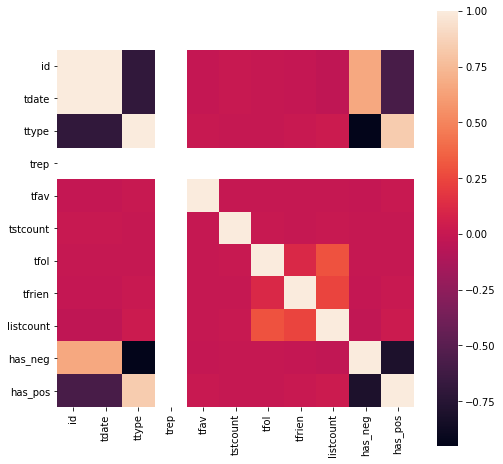

In [93]:
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, square=True)
plt.show()

Какие признаки сильно скоррелированы? Как это можно объяснить?

Посмотрим на еще одну визуализацию: [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

Эта функция выдает матрицу из графиков: по диагонали стоят гистограммы значений каждого признака, а в остальных ячейках &mdash; графики значений каждого признака против каждого. Кроме того, точки на графиках можно раскрасить в разные цвета по какому-либо категориальному признаку с помощью аргумента ```hue```. Это позволяет сравнить, какие значения принимает признак в зависимости от категории. Давайте раскрасим наши графики по ```ttype```, чтобы сравнить распределения признаков для позитивных и негативных твитов.

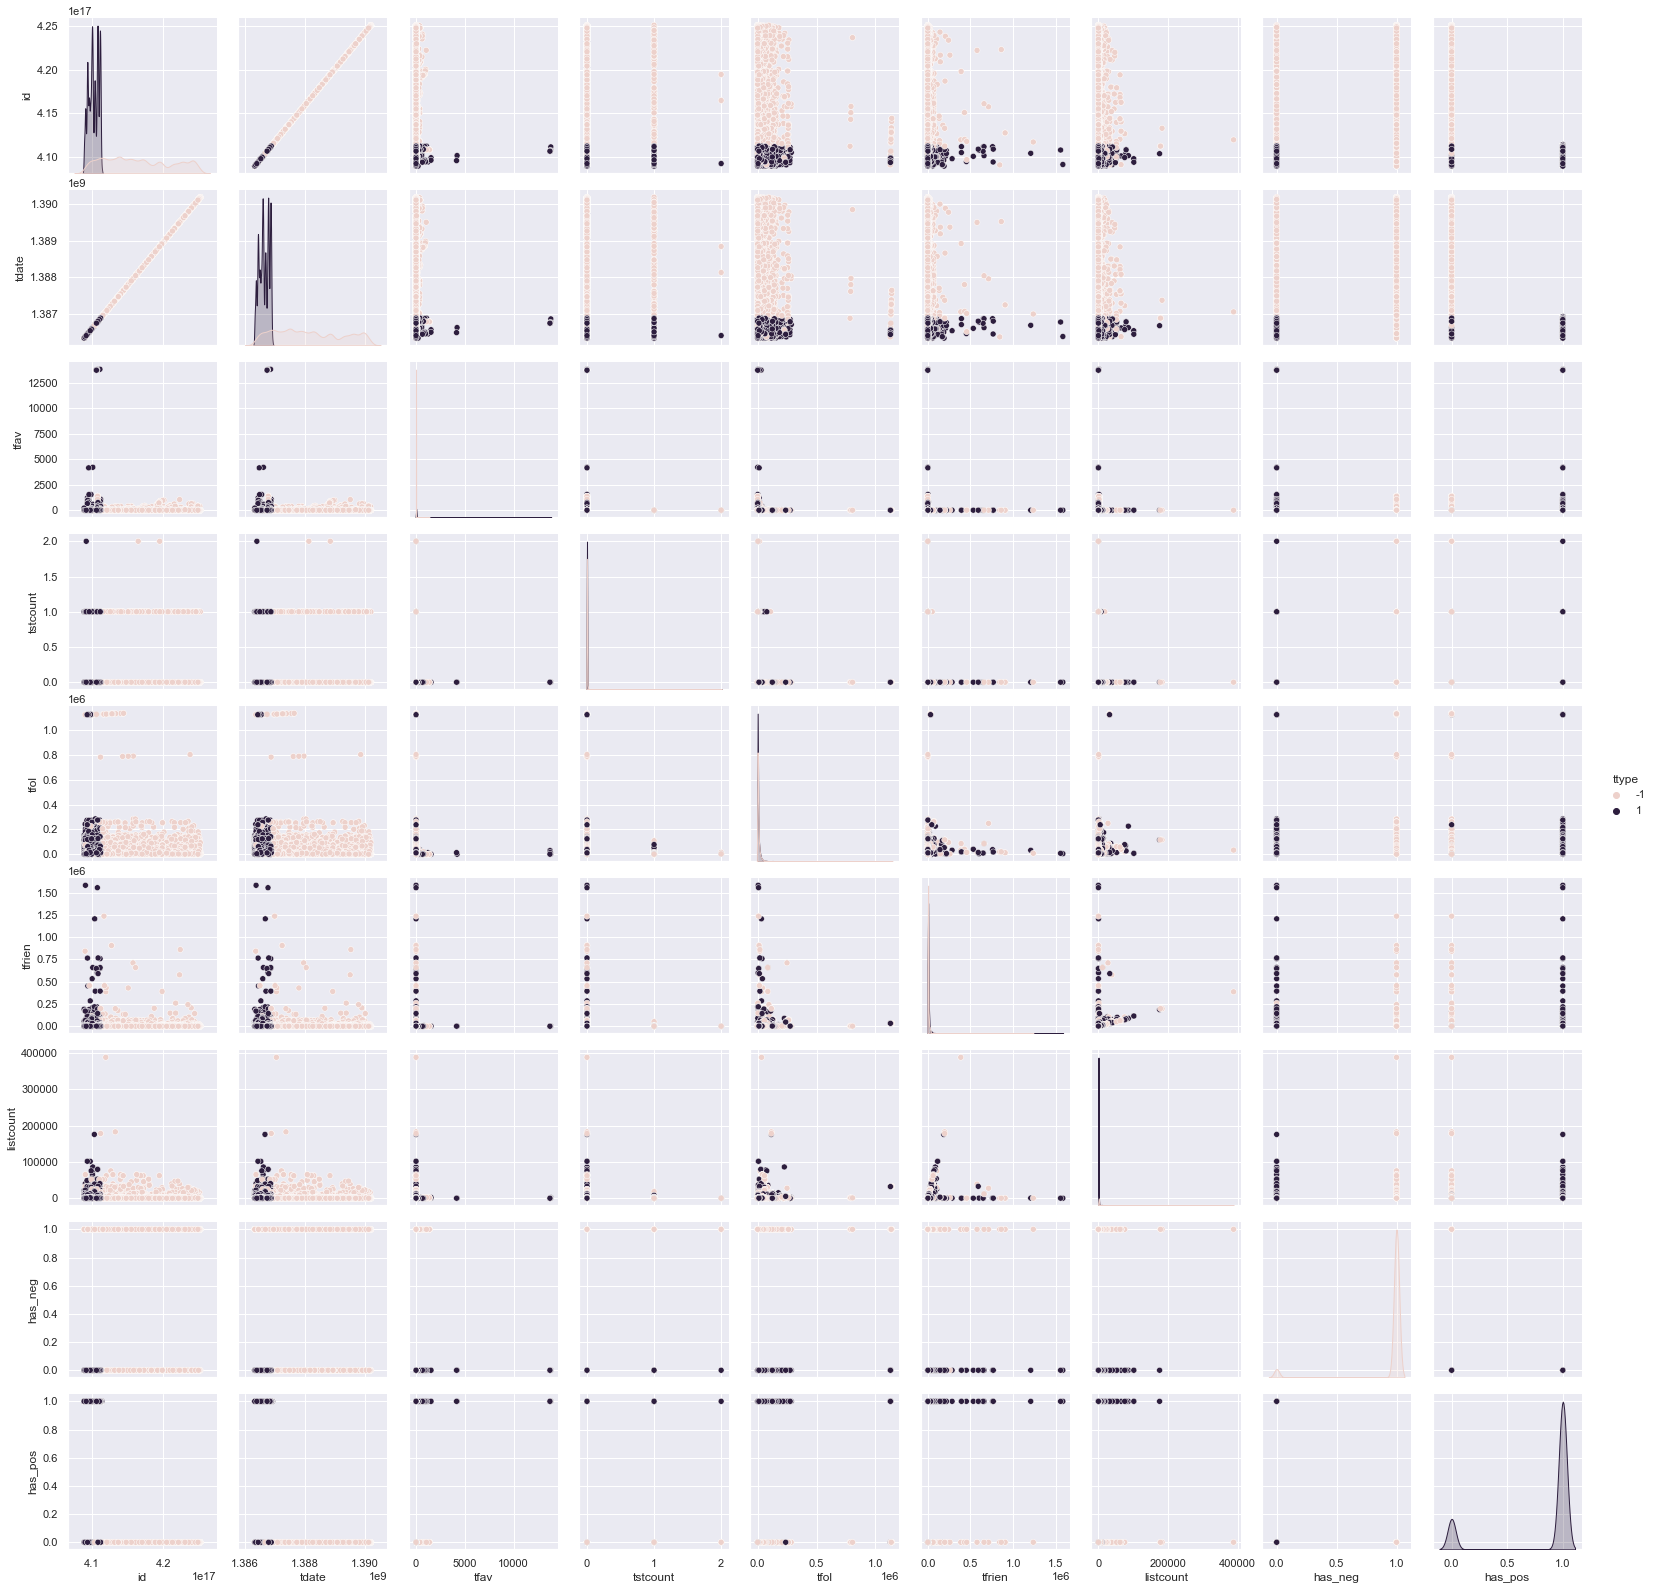

In [94]:
sns.set()
cols = ['id', 'tdate', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount', 'ttype', 'has_neg', 'has_pos']
sns.pairplot(data[cols], hue='ttype')

Давайте посмотрим на графики и ответим на вопросы:
* Между какими признаками видна зависимость? Как ее можно объяснить?
* Какие признаки будут полезны для предсказания типа твита, а какие, скорее всего, бесполезны? Почему?

Построим отдельно самые интересные зависимости:

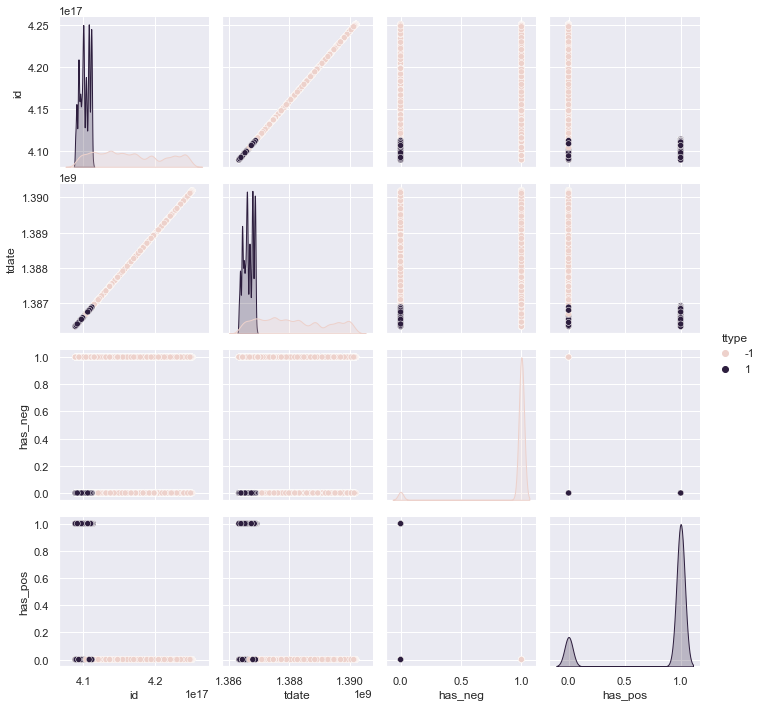

In [95]:
sns.set()
cols = ['id','tdate', 'ttype', 'has_neg', 'has_pos']
sns.pairplot(data[cols], hue='ttype')

# Scikit-Learn 

Scikit-learn $-$ это библиотека, в которой реализованы основные алгоритмы машинного обучения. Также реализованы методы для подбора гиперпараметров (например, кросс-валидации) и обработки данных. У всех алгоритмов унифицированный интерфейс, так что вы можете легко пробовать различные методы и добавлять свои.

На семинаре мы рассмотрим стандартный сценарий работы с sklearn. В качестве датасета рассмотрим [__Ames Housing dataset__](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), в котором требуется предсказать стоимость квартиры по ряду признаков (площадь, количество комнат, год постройки и т.д., полнон описание данных можно посмотреть на kaggle).

TL;DR:
* Обработка и визуальный анализ данных
* Обучение линейно регрессии в scikit-learn
* Подбор гиперпараметров
* Знакомство с Pipeline

----

In [96]:
! wget https://www.dropbox.com/s/1ymnz6k1p0cezo7/house_prices.csv

--2022-02-07 16:03:04--  https://www.dropbox.com/s/1ymnz6k1p0cezo7/house_prices.csv
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6026:18::a27d:4612, 162.125.70.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6026:18::a27d:4612|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1ymnz6k1p0cezo7/house_prices.csv [following]
--2022-02-07 16:03:04--  https://www.dropbox.com/s/raw/1ymnz6k1p0cezo7/house_prices.csv
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3390476a852162813df9090de5.dl.dropboxusercontent.com/cd/0/inline/BfRfrVWp3vbUw2CbLvBro-V3SuOwmtIAtkDoUeDgtiD6B6p0eNaFQSIEEoEQrPYMeNfSzXvUcSCxVKin-4n7rqqYEpRRL9mb_GR4SMLxq5X9ypvK9s55-LCoj4aiZjrZQviDAjHPCR-zhi7VijTUPWIW/file# [following]
--2022-02-07 16:03:05--  https://uc3390476a852162813df9090de5.dl.dropboxusercontent.com/cd/0/inline/BfRfrVWp3vbUw2CbLvBro-V3SuOwmtIAtkDoUeDgtiD6B6p0eNaFQSIEEoE

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

## 1. Загрузка данных

In [ ]:
data = pd.read_csv('./house_prices.csv', index_col='Id')

Перед тем, как бросаться строить регрессию, почти всегда полезно посмотреть на данные и понять, что они из себя пердставляют (провести анализ).

* Для начала посмотрим на матрицу корреляций признаков и целевой переменной

In [ ]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

Можно увидеть, что пары `TotalBsmtSF`-`1stFlrSF` и `GarageYrBlt`-`YearBuilt` сильно скоррелированны, что неудивительно, если посмотреть на их описание:

- __TotalBsmtSF__: Total square feet of basement area
- __1stFlrSF__: First Floor square feet


- __YearBuilt__: Original construction date
- __GarageYrBlt__: Year garage was built

Линейная зависимость признаков ([мультиколлинеарность](https://ru.wikipedia.org/wiki/Мультиколлинеарность)) приводит к существованию множества эквивалентных решений задачи регрессии, а значит, к нестабильности. Поэтому выбросим эти признаки:

In [ ]:
data.drop(['TotalBsmtSF', 'GarageYrBlt'], 1, inplace=True)

In [ ]:
data

## 2. Предобработка

Для того, чтобы быстро оценить распределение признаков, удобно смотреть на [Box Plot](https://en.wikipedia.org/wiki/Box_plot), который показывает медиану, нижний и верхний квартили, а также максимальное и минимальное значение и выбросы. Кроме того, можно построить гистограммы, чтобы понять вид распределения.

In [ ]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['SalePrice'])
plt.subplot(1, 2, 2)
sns.distplot(data['SalePrice']);

Распределение цен имеет достаточно тяжелый правый хвост, в процессе оптимизации ошибка на таких объектах будет штрафоваться сильнее, поэтому прологарифмируем значение целевой переменной, чтобы получить более симметричное распределение.

In [ ]:
data['logSalePrice'] = np.log(data['SalePrice'])
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['logSalePrice'])
plt.subplot(1, 2, 2)
sns.distplot(data['logSalePrice']);

### Пропуски в данных

Зачастую в реальных данных не для всех объектов известно значение того или иного признака. Такие объекты нужно обрабатывать прежде чем приступать к обучению. Для каждого признака посмотрим, в какой доле объектов отсутствует значение.

In [ ]:
clmns = data.columns[data.isnull().any()]
missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
missed

Некоторые признаки отсутствуют для большого числа объектов, поэтому имеет смысл их выкинуть.

In [ ]:
data.drop(missed[missed['% NULL'] > 0.99].index, 1, inplace=True)

Оставшиеся пропуски заполним значением медианным значением для действительных признаков и модой для категориальных.

In [ ]:
fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
data = data.fillna(value=fill)

### Категориальные признаки

Некоторые признаки в датасете являются категориальными и принимают текстовые значения. Практически все модели в машинном обучении предполагают, что данные представлены в числовом виде, поэтому такие признаки нужно сначала обработать, чтобы обучить регрессию. Один из самых простых и распространенных способов $-$ _one-hot encoding_, создающий для каждого категориального признака, принимающего $K$ различных значений, столько же бинарных признаков, при этом для каждого объекта ровно один из них (соответствующий значению исходного категориального признака на объекте) будет принимать значение 1, остальные будут равны нулю:

![](https://i.imgur.com/mtimFxh.png)

In [ ]:
cat_clmns = data.columns[data.dtypes == 'object']
data[cat_clmns].head()

Для описанного выше преобразования в `scekit-learn` существует объект [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), однако он работает только со значениями типа `int`, поэтому необходимо сначала для каждого признака пронумеровать уникальные значения и использовать эти номера вместо исходных значений признака (в этом нам поможет [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)).

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
encoders = [LabelEncoder().fit(data[c]) for c in cat_clmns]
cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(encoders, cat_clmns)]).T

In [ ]:
cat_fts

Теперь ко всем таким категориальным признакам применим One-Hot кодирование:

In [ ]:
ohe = OneHotEncoder()
ohe.fit(cat_fts)
cat_ohe = ohe.transform(cat_fts).toarray()
cat_ohe

In [ ]:
real_clmns = data.columns[data.dtypes != 'object']
a = pd.DataFrame(cat_ohe, index=data.index)
data = pd.concat([data[real_clmns], a], axis=1)
data.head()

## 3. Обучение

В данном разделе мы разделим выборку на обучающую и тестовую и построим обычную линейную регрессию.

При разбиениb выборки на тестовую и обучающую нужно быть внимательными. В данном случае мы решаем не просто задачу регресcии, но прогнозирования, поэтому обучаться на данных за 2010 год и предсказывать значения цен для 2009 года смысла не очень много.

In [ ]:
yrsold = data['YrSold']
sorted(yrsold.unique())

In [ ]:
train_x = data[data['YrSold'] <= 2009]
test_x = data[data['YrSold'] == 2010]

test_y = test_x['SalePrice']
train_y = train_x['SalePrice']

test_x, train_x = test_x.drop(['SalePrice', 'logSalePrice'], 1), train_x.drop(['SalePrice', 'logSalePrice'], 1)
train_idxs, val_idxs = np.where(train_x['YrSold'] < 2009)[0], np.where(train_x['YrSold'] == 2009)[0]

In [ ]:
print('train_size = %.2f' % (train_idxs.shape[0] * 1.0 / data.shape[0]))
print('val_size = %.2f' % (val_idxs.shape[0] * 1.0 / data.shape[0]))
print('test_size = %.2f' % (test_x.shape[0] * 1.0 / data.shape[0]))

т.к. метрика RMSE штрафует по-разному занижение и завышение цены, в качестве целевой метрики мы будем использовать MAPE, которая показывает ошибку в процентах от истинного значения.

$$ \text{MAPE} = \dfrac{1}{l} \sum_{i=1}^l \dfrac{|y_i - a(x_i) |}{y_i} $$

In [ ]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Обучим обычную линейную регрессию (обратим вниманием, что в процессе обучения оптимизируется функционал MSE, однако качество на тесте мы будем считать при помощи функционала MAPE) и сравним качество моделей, обученных с логарифмированием целевой переменной и без. При этом качество нужно, очевидно, считать в исходных значениях для обеих моделей.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

lr = LinearRegression()
lr.fit(train_x, train_y)

test_p = lr.predict(test_x)
print('Using Y:')
print('Test MAPE %.2f%%' % mape(test_y, test_p))
print('Test RMSE %.3f' % mean_squared_error(test_y, test_p)**0.5)
print('Test RMSLE %.3f' % mean_squared_log_error(test_y, test_p)**0.5)
print('Test R2 %.3f\n' % r2_score(test_y, test_p))


lr.fit(train_x, np.log(train_y))
test_p = np.exp(lr.predict(test_x))
print('Using logY:')
print('Test MAPE %.2f%%' % mape(test_y, test_p))
print('Test RMSE %.3f' % mean_squared_error(test_y, test_p)**0.5)
print('Test RMSLE %.3f' % mean_squared_log_error(test_y, test_p)**0.5)
print('Test R2 %.3f' % r2_score(test_y, test_p))

## 5. Подбор гиперпараметров

Чтобы избежать переобучения, к функционалу обычной линейной регрессии добавляют регуляризаторы, например $L_2$:

$$ Q(w) = \text{MSE}(X, w) + \alpha \cdot L_2(w)$$

$$ L_2(w) = \sum_{i=1}^{d} w_{i}^2 $$
$$ \text{MSE}(X, w) = \sum_{i=1}^l (w^Tx_i - y_i)^2 $$

Но встает вопрос о выборе коэффициента регуляризации $\alpha$. Если настраивать этот параметр по обучающей выборке, то лучшим вариантом будет $\alpha = 0$, т.к. именно в этом случае функционал принимает минимальное значение, однако качество на тесте скорее всего упадет, поскольку модель начнет настраиваться под особенности обучающей выборки вместо выявления общих закономерностей в данных. Поэтому нужно пользоваться отложенной выборкой или кросс-валидацией для подбора гиперпараметров.


![](images/K-fold_cross_validation.jpeg)


In [ ]:
def mape_scorer(estimator, X_test, y_test):
    return -mape(np.exp(y_test), np.exp(estimator.predict(X_test)))

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.logspace(-6, 3, 20)
}

cv = GridSearchCV(Ridge(), params, cv=[[train_idxs, val_idxs]], scoring=mape_scorer)
cv.fit(train_x, np.log(train_y));

In [ ]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val MAPE'] = -cv.cv_results_['mean_test_score']
cv_grid

In [ ]:
plt.title(r'Validation MAPE')
plt.semilogx(cv_grid['alpha'], cv_grid['val MAPE'], label='Validation')

best_l2 = cv.best_params_['alpha']
plt.vlines(best_l2, 8, 11, linestyles='--', color='gray', label='min')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MAPE, %');

In [ ]:
print('Test MAPE %.3f' % -mape_scorer(cv, test_x, np.log(test_y)))

Посмотрим на 10 самых значимых признаков и их корреляции с целевой переменной:

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Coef')
w = cv.best_estimator_.coef_
arg = np.argsort(np.abs(w))[-10:]
clmns = train_x.columns.values[arg]
w = w[arg]

x = np.arange(len(w))
plt.barh(x, w)
plt.yticks(x, clmns);

plt.subplot(1, 2, 2)
plt.title('Correlation')
corr = data.corr()
x = np.arange(len(w))
plt.barh(x, corr['logSalePrice'][clmns])
plt.yticks(x, clmns);

## 6. Pipeline

Как мы увидели, процесс построения алгоритма машинного обучения от сырых данных до предсказания можно разделить на несколько этапов:

* Обработка/фильтрация данных
* Добавление новых признаков
* Обучение алгоритма

Для удобства все эти этапы можно объединить в один [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [ ]:
data = pd.read_csv('house_prices.csv', index_col='Id')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin,BaseEstimator
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

UNIQUE = {c: data[c][~data[c].isnull()].unique() for c in data.columns[data.dtypes == 'object']}

class MyTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, null_threshold):
        self.null_threshold = null_threshold
        self.drop_clmns = []
        self.encoder = None

    def transform(self, x, y=None):
        data = x.copy()
        
        data.drop(['TotalBsmtSF', 'GarageYrBlt'], 1, inplace=True, errors='ignore')
        data.drop(self.drop_clmns, 1, inplace=True)

        data = data.fillna(value=self.fill)

        cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(self.encoders, self.cat_clmns)]).T
        cat_ohe = self.ohe.transform(cat_fts).toarray()

        real_clmns = data.columns[data.dtypes != 'object']
        cat_ohe = pd.DataFrame(data=cat_ohe, index=data.index)
        data = pd.concat([data[real_clmns], cat_ohe], axis=1)
        
        return data
    
    def fit(self, x, y=None):
        data = x.copy()
        data.drop(['TotalBsmtSF', 'GarageYrBlt'], 1, inplace=True, errors='ignore')
        
        # drop and fill NULLs
        clmns = data.columns[data.isnull().any()]
        missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
        self.drop_clmns = missed[missed['% NULL'] > self.null_threshold].index
        data.drop(self.drop_clmns, 1, inplace=True)
        
        # Fill remaining NULLs
        self.fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
        data = data.fillna(value=self.fill)
        
        # Encode categorical features (str -> int)
        self.cat_clmns = data.columns[data.dtypes == 'object']
        self.encoders = [LabelEncoder().fit(vals) for c, vals in UNIQUE.items() if c in self.cat_clmns]
        
        cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(self.encoders, self.cat_clmns)]).T

        self.ohe = OneHotEncoder(handle_unknown='ignore')
        self.ohe.fit(cat_fts)

        return self
    
    
class MyScaler(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.scaler = StandardScaler()
        
    def transform(self, x, y=None):
        x = x.copy()
        x.loc[:, self.clmns] = self.scaler.transform(x[self.clmns])
        return x
    
    def fit(self, x, y=None):
        cond = x.dtypes == 'float'
        self.clmns = cond[cond].index
        self.scaler.fit(x[self.clmns])
        return self

In [ ]:
train_x = data[data['YrSold'] <= 2009]
test_x = data[data['YrSold'] == 2010]

test_y = test_x['SalePrice']
train_y = train_x['SalePrice']

test_x, train_x = test_x.drop('SalePrice', 1), train_x.drop('SalePrice', 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



pipe = Pipeline([
    ('process', MyTransformer(0.)),
    ('scale', MyScaler()),
    ('reg', LinearRegression())
])

## Зачем?

* Снижает риск забыть совершить какое-то из преобразований, например, с новыми данными
* Позволяет довольно просто добавлять новое преобразование в середину процесса
* Позволяет просто перебирать комбинации методов и их гиперпараметры и сравнивать друг с другом

Выше мы перебирали значение коэффициента регуляризации при помощи перебора по сетке. Заметим, что тип регуляризации (L1, L2 или без регуляризации), а также порог на долю отсутствующих значений признака, по которому мы удаляли признаки из данных, также являются гиперпараметрами нашей модели и могут быть подобраны по валидационной выборке с помощью уже знакомого `GridSearchCV`.

In [ ]:
# %debug

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

params = [{
    'process__null_threshold': [0., 0.005, 0.1],
    'reg': [LinearRegression()]
}, {
    'process__null_threshold': [0., 0.005, 0.1, 0.5, 0.9],
    'reg': [Ridge(), Lasso()],
    'reg__alpha': np.logspace(-4, 4, 9)
}]
train_idxs, val_idxs = np.where(train_x['YrSold'] < 2009)[0], np.where(train_x['YrSold'] == 2009)[0]
cv = GridSearchCV(pipe, params, cv=[[train_idxs, val_idxs]], scoring=mape_scorer)
cv.fit(train_x, np.log(train_y))

Соберем итоги валидации в датафрейм, где каждая строчка это один запуск, а в колонках указаны параметры а также скор на валидации.

In [ ]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val MAPE'] = -cv.cv_results_['mean_test_score']
cv_grid['reg__alpha'] = cv_grid['reg__alpha'].fillna('0.')
cv_grid['reg'] = cv_grid['reg'].apply(lambda x: x.__class__.__name__)
cv_grid.head()

С помощью [seaborn](https://seaborn.pydata.org) отобразим полученные результаты.

In [ ]:
sns.catplot(x='reg__alpha', y='val MAPE', data=cv_grid[cv_grid['val MAPE'] < 12], col='reg',
            hue='process__null_threshold', kind='point')

In [ ]:
cv.best_params_

In [ ]:
print('Test MAPE %.3f' % -mape_scorer(cv, test_x, np.log(test_y)))